## Part 1: Import Statements

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from collections import Counter


from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Part 2: Import processed data

In [2]:
data = pd.read_csv("Data/processed_data.csv", index_col=0)
data = data.dropna()
data


,tweet,class
0,woman shouldnt complain cleaning house man alw...,2
1,boy dats coldtyga dwn bad cuffin dat hoe place,1
2,dawg ever fuck bitch stato cry confused shit,1
3,look like tranny,1
4,shit hear might true might faker bitch told ya,1
...,...,...
25291,yous muthafin lie right tl trash mine bible sc...,1
25292,youve gone broke wrong heababy drove redneck c...,2
25294,young buck wan na eat dat nigguh like aint fuc...,1
25295,youu got wild bitches tellin lies,1


## Part 3: Splitting data 

Splitting data 

In [3]:

#splitting the data into train, validation, test
X, X_test, y, y_test = train_test_split(data['tweet'], data['class'],  test_size=0.2, random_state=42)

In [4]:
#splitting the data into train and validation
X_train, X_cv, y_train, y_cv = train_test_split(X,y,test_size = 0.25,train_size =0.75, random_state=42)

In [5]:
X_train.sample(5)

8851          damn use big fan ronda far shes big cunt tuf
14476                                             im pussy
4789                             hoe cookie crisp cop case
3639                      lmao denote got bitch right love
991      face tears joy lmfao watching porn beating yo ...
Name: tweet, dtype: object

## Part 4: Feature Extraction

## Count Vectorization

Word n grams: unigrams

In [6]:
#Count Vectorizing the X_train
count_vec = CountVectorizer()
count_vec.fit(X_train)

X_train_count = count_vec.transform(X_train)
X_train_count = X_train_count.toarray()

#Count Vectorizing the X_cv
X_cv_count = count_vec.transform(X_cv)
X_cv_count = X_cv_count.toarray()

#Count Vectorizing the X_test
X_test_count = count_vec.transform(X_test)
X_test_count = X_test_count.toarray()

count_vec.vocabulary_

{'stop': 13309,
 'spoiling': 12986,
 'fags': 4628,
 'wcw': 15221,
 'babes': 805,
 'love': 8196,
 'thse': 14058,
 'sexy': 12145,
 'bitches': 1302,
 'bestfriend': 1181,
 'babe': 804,
 'yanks': 15762,
 'coming': 2736,
 'disparagement': 3764,
 'pride': 10705,
 'rather': 11121,
 'jack': 7110,
 'fuck': 5249,
 'hoes': 6379,
 'tbh': 13780,
 'shit': 12260,
 'boring': 1545,
 'give': 5558,
 'wife': 15449,
 'lmfao': 8072,
 'little': 8038,
 'like': 7968,
 'message': 8649,
 'hoe': 6363,
 'need': 9246,
 'plan': 10391,
 'stuff': 13400,
 'thats': 13929,
 'saying': 11886,
 'ive': 7100,
 'pinto': 10352,
 'since': 12441,
 'dude': 4065,
 'iphone': 7026,
 'beginning': 1107,
 'gerryshalloweenparty': 5478,
 'halloween': 5985,
 'yesterday': 15833,
 'stupid': 13412,
 'nigger': 9376,
 'youre': 15879,
 'dismissed': 3761,
 'bitch': 1290,
 'wan': 15127,
 'na': 9137,
 'play': 10412,
 'thumper': 14070,
 'tounge': 14276,
 'punching': 10878,
 'smelly': 12671,
 'turtle': 14530,
 'pussy': 10907,
 'lady': 7669,
 'next': 9

Vocabulary of train and test set with respective counts

In [7]:
words = []
amounts = []
for key, value in count_vec.vocabulary_.items():
    words.append(key)
    amounts.append(value)

word_counts = pd.DataFrame(words, columns = ["words"])
word_counts["amounts"] = amounts

In [8]:
word_counts.sort_values(by = "amounts", ascending = False, inplace = True)

TFIDF Vectorization

In [9]:
#TFIDF Vectorizing the X_train

tfidf = TfidfVectorizer()

X_train_tf = tfidf.fit_transform(X_train)
X_train_tf = X_train_tf.toarray()

#Vectorizing the X_cv
X_cv_tf = tfidf.transform(X_cv)
X_cv_tf = X_cv_tf.toarray()

#TFIDF Vectorizing the X_test
X_test_tf = tfidf.transform(X_test)
X_test_tf = X_test_tf.toarray()


Balancing training data

In [10]:

def oversample(X_train_vectorized, y_train):
    print("Before Oversampling: {}".format(Counter(y_train)))

    # # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy='all')

    # # fit and apply the transform
    X_train_over, y_train_over = oversample.fit_resample(X_train_vectorized, y_train)
    print("After Oversampling: {}".format(Counter(y_train_over)))
    
    return X_train_over, y_train_over

## Oversampling

Oversampling CountVectorized training data

In [11]:
X_train_over_count, y_train_over_count = oversample(X_train_count, y_train)

Before Oversampling: Counter({1: 11062, 2: 2437, 0: 820})
After Oversampling: Counter({1: 11062, 2: 11062, 0: 11062})


Oversampling TFIDF-Vectorized  training data

In [12]:
X_train_over_tf, y_train_over_tf = oversample(X_train_tf, y_train)

Before Oversampling: Counter({1: 11062, 2: 2437, 0: 820})
After Oversampling: Counter({1: 11062, 2: 11062, 0: 11062})


## Models

In [13]:
def printModelStats(y_preds, y_test):
    print(classification_report(y_test, y_preds, target_names = ['Hate', 'Offensive', 'Neither']))
    
    cm = confusion_matrix(y_preds, y_test)
    print("The confusion matrix:")
    print(cm)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    sns.heatmap((cm_percent), annot = True, cmap = "Blues").set(title ="Confusion Matrix Expressed in %")

## Naive Bayes

## Count Vectorization

MultinomialNB and data with CountVectorizations

In [14]:
# Initalising model
nb = MultinomialNB()

# Train and predict
nb.fit(X_train_over_count, y_train_over_count)
y_preds = nb.predict(X_cv_count)


              precision    recall  f1-score   support

        Hate       0.23      0.50      0.32       269
   Offensive       0.93      0.87      0.90      3670
     Neither       0.84      0.76      0.80       834

    accuracy                           0.83      4773
   macro avg       0.67      0.71      0.67      4773
weighted avg       0.87      0.83      0.85      4773

The confusion matrix:
[[ 134  372   73]
 [ 115 3200  131]
 [  20   98  630]]


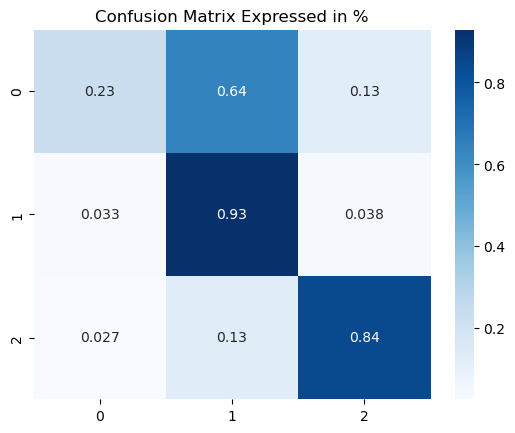

In [15]:
# output statistics
printModelStats(y_preds, y_cv)

Gridsearch for optimization

In [16]:
# param_grid = {
#     ##to do
#     # }

# nb = MultinomialNB(random_state= 424)

# grid_search_nb_count = GridSearchCV(nb, param_grid, cv = 5)
# grid_search_nb_count.fit(X_train_over_count, y_train_over_count)
# grid_search_nb_count.best_params_
    

NB Model with best parameters for Count Vectorizations

In [17]:
# # Initalising model
# nb = MultinomialNB(random_state= 424)

# # Train and predict
# nb.fit(X_train_over_count, y_train_over_count)
# y_preds = nb.predict(X_test_count)


In [18]:
# # output statistics
# printModelStats(y_preds, y_test)

## TFIDF

Linear SVC and data with TFIDF Vectorizations

In [19]:
# Initalising model
nb = MultinomialNB()

# Train and predict
nb.fit(X_train_over_tf, y_train_over_tf)
y_preds = nb.predict(X_cv_tf)



              precision    recall  f1-score   support

        Hate       0.19      0.51      0.28       269
   Offensive       0.92      0.82      0.87      3670
     Neither       0.78      0.73      0.75       834

    accuracy                           0.79      4773
   macro avg       0.63      0.69      0.63      4773
weighted avg       0.86      0.79      0.82      4773

The confusion matrix:
[[ 138  500   87]
 [ 109 3024  140]
 [  22  146  607]]


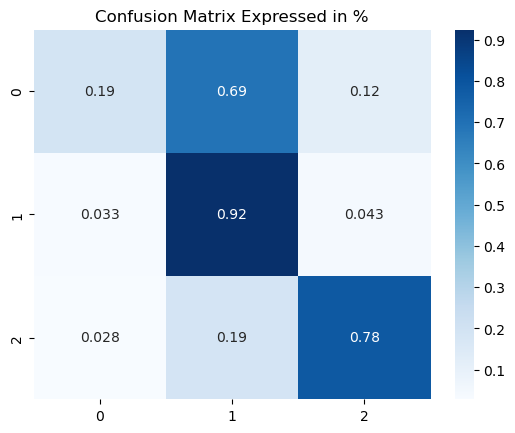

In [20]:
# output statistics
printModelStats(y_preds, y_cv)

Grid Search for SVM with TFIDF

In [21]:
# param_grid = {
#     }

# nb = MultinomialNB(random_state= 424, max_iter = 20000)

# grid_search_svc_tf = GridSearchCV(nb, param_grid, cv = 5)
# grid_search_svc_tf.fit(X_train_over_tf, y_train_over_tf)
# grid_search_svc_tf.best_params_

Optimal model

In [22]:
# # Initalising model
# nb = MultinomialNB()

# # Train and predict
# nb.fit(X_train_over_tf, y_train_over_tf)
# y_preds = nb.predict(X_test_tf)


In [23]:
# # output statistics
# printModelStats(y_preds, y_test)